In [1]:
import torch
import numpy as np
import re
import matplotlib.pyplot as plt


import torch
import re
import numpy as np

def load_data_to_tensor(file_path):
    # 读取数据
    data_list = []

    with open(file_path, 'r') as file:
        for line in file:
            match = re.search(r'bs=(\d+)\s*, dimX=(\d+)\s*, DY=(\d+)\s*, N=(\d+)\s*, K=(\d+)\s*, TIME=\s*([\d.]+)ms', line)
            if match:
                bs, dimX, DY, N, K, time = map(float, match.groups())
                data_list.append([bs, dimX, DY, N, K, time])

    # 转换为 PyTorch Tensor
    data_array = np.array(data_list)  # shape: (N, 6)

    # 提取唯一值，确定 Tensor 形状
    bs_vals = np.unique(data_array[:, 0])
    dimX_vals = np.unique(data_array[:, 1])
    DY_vals = np.unique(data_array[:, 2])
    N_vals = np.unique(data_array[:, 3])
    K_vals = np.unique(data_array[:, 4])

    # 创建 5D Tensor，并初始化为 NaN
    tensor_shape = (len(bs_vals), len(dimX_vals), len(DY_vals), len(N_vals), len(K_vals))
    tensor_data = torch.full(tensor_shape, float('nan'), dtype=torch.float32)

    # 映射参数值到索引
    def get_index(val, arr):
        return np.where(arr == val)[0][0]

    # 填充数据
    for row in data_array:
        bs_idx = get_index(row[0], bs_vals)
        dimX_idx = get_index(row[1], dimX_vals)
        DY_idx = get_index(row[2], DY_vals)
        N_idx = get_index(row[3], N_vals)
        K_idx = get_index(row[4], K_vals)
        tensor_data[bs_idx, dimX_idx, DY_idx, N_idx, K_idx] = row[5]  # 存 TIME
    # print(tensor_data.shape)
    tensor_data = tensor_data.permute(1, 2, 3, 0, 4).reshape(2, 2, 15, 16)
    return tensor_data, bs_vals, dimX_vals, DY_vals, N_vals, K_vals

file_path = [
			'exp_data/1D_A', 
			'exp_data/1D_B', 
			'exp_data/1D_C', 
			'exp_data/1D_D', 
			'exp_data/1D_E']
data = []
# plt.figure(figsize=(20, 4))

for file in file_path:
	tensor_data, bs_vals, dimX_vals, DY_vals, N_vals, K_vals = load_data_to_tensor(file)
	data.append(tensor_data)
print(type(data))

<class 'list'>


In [2]:

# print(data)
min_data = data[0]
for i in range(len(data) - 1):
	min_data = torch.min(min_data, data[i])
performance_ratio =  data[-1] / min_data
# for i in range(1, len(performance_ratio)):
# 	if performance_ratio[i] > 1.6:
# 		print(data[0][i], data[1][i, -1])
# 	# print(performance_ratio[i])
# print(min_data.shape)
# perf_ratio = min_data /
# print(min_data.shape)

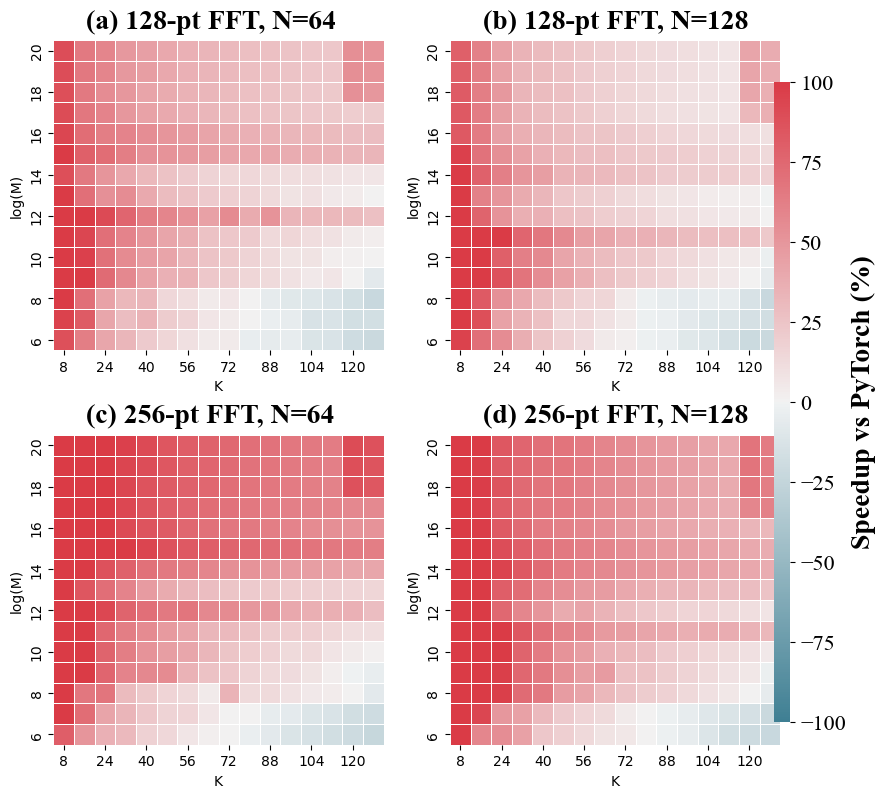

In [3]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8),)
fig.tight_layout()
fig.subplots_adjust(hspace=0.14, wspace=0.20)
bd = 100
import seaborn as sns
import matplotlib.pyplot as plt
import torch as th
# 设置为 Type1 字体
fontsize = 20
plt.rcParams['pdf.fonttype'] = 42  # Type1 字体
plt.rcParams['ps.fonttype'] = 42   # Type1 字体

plt.rcParams["font.family"] = "Times New Roman"
plt.rc('font', size=16,)
label = [
    '(a) 128-pt FFT, N=64',
    '(b) 128-pt FFT, N=128',
    '(c) 256-pt FFT, N=64',
    '(d) 256-pt FFT, N=128',
    # '(a) FFT size = 128\n        N = 64',
    # '(b) FFT size = 128\n        N = 128',
    # '(c) FFT size = 128\n        N = 64',
    # '(d) FFT size = 128\n        N = 128',
]
cmap = sns.diverging_palette(220, 10, as_cmap=True)
cbar_ax = fig.add_axes([.96, .1, .02, .8], label='Overhead vs cuFFT (%)')
for i in range(2):
	for j in range(2):
		heatmap = (performance_ratio[i, j]) * 100 - 100
		sns_plot = sns.heatmap(heatmap, cmap=cmap, 
						 vmax=bd, vmin=-bd,center=0,
	# sns_plot = sns.heatmap((TurboFFT[i]/cuFFT[i]) * 100 - 100, cmap=cmap, vmax=50, center=0,
			square=True, linewidths=.5, cbar_kws={"shrink": .5}, 
			ax=ax[i, j],
			cbar_ax=cbar_ax if i == 0 else None, cbar=i == 0)
	# print(vkFFT[:30, :30].shape)
		ax[i, j].invert_yaxis()
cbar_ax.set_ylabel('Speedup vs PyTorch (%)', fontdict={'fontsize': fontsize, 'weight': 'bold'})
# fig.colorbar(ax.get_children()[0], orientation="horizontal")

for i in range(2):
	b = 0.1
	ax[i, 0].text(.1, 1.1, label[i * 2], ha='left', va='top', transform=ax[i, 0].transAxes, fontsize=fontsize, fontdict={'weight': 'bold'})
	ax[i, 1].text(.1, 1.1, label[i * 2 + 1], ha='left', va='top', transform=ax[i, 1].transAxes, fontsize=fontsize, fontdict={'weight': 'bold'})
	# ax[i, 0].text(.45 + b, .8, precision[i], ha='left', va='top', transform=ax[i, 0].transAxes, fontsize=fontsize, fontdict={'weight': 'bold'})
	# ax[i, 1].text(.425 + b, .8, precision[i], ha='left', va='top', transform=ax[i, 1].transAxes, fontsize=fontsize, fontdict={'weight': 'bold'})
	for j in range(2):
		b = 0.5
		# ax[i, j].set_yticks([0 + b, 4 + b, 9+ b, 14+ b, 19+ b, 24+ b])
		# ax[i, j].set_yticklabels([1, 5, 10, 15, 20, 25])
		ax[i, j].set_yticks([i + b for i in range(0, 16, 2)])
		ax[i, j].set_yticklabels([i + 6 for i in range(0, 16, 2)])
		
		ax[i, j].set_xticks([i + b for i in range(0, 16, 2)])
		ax[i, j].set_xticklabels([(i + 1) * 8 for i in range(0, 16, 2)])
		
		ax[i, j].set_ylabel('log(M)')
		ax[i, j].set_xlabel('K')

plt.savefig('1D_heatmap.pdf', bbox_inches='tight')


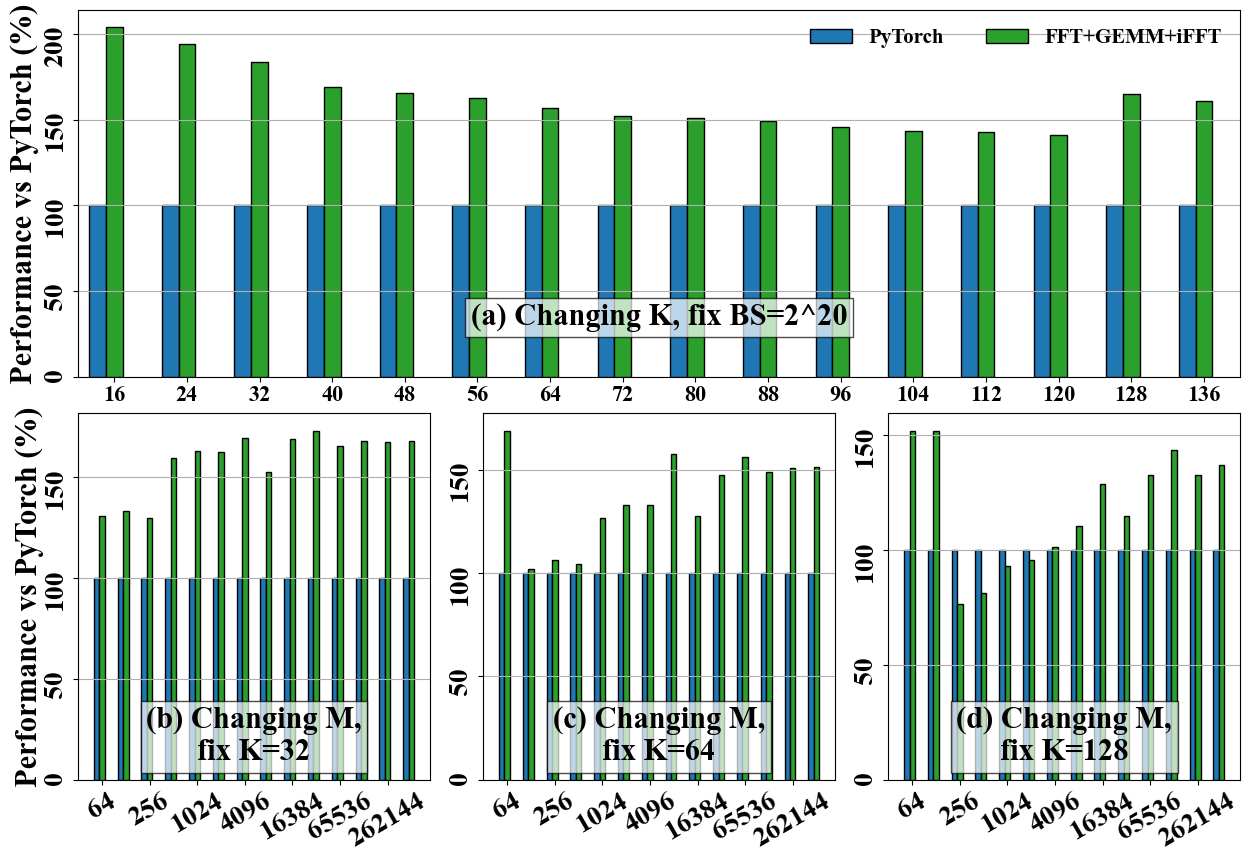

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import torch as th
import numpy as np
import matplotlib as mpl
# mpl.rcParams['text.usetex'] = True

# # Specify the font: Times New Roman
# mpl.rcParams['text.latex.preamble'] = r'\usepackage{times}'
plt.rcParams['pdf.fonttype'] = 42  # Type1 字体
plt.rcParams['ps.fonttype'] = 42   # Type1 字体

font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 20}
mpl.rc('font', **font)
gpu = 'A100'
fontsize = 20
logN_beg, logN_end = 1, 26
logBS_beg, logBS_end = 0, 4


N_list = [4, 10, 14, 20]
# fig, ax = plt.subplots(2, 3, figsize=(15, 10))
precision = 1
fig = plt.figure(figsize=(15, 10))
ax = []
ax.append(fig.add_subplot(2, 1, 1))
tmp_axs = []
tmp_axs.append(fig.add_subplot(2, 3, 4))
tmp_axs.append(fig.add_subplot(2, 3, 5))
tmp_axs.append(fig.add_subplot(2, 3, 6))
ax.append(tmp_axs)

fig.subplots_adjust(hspace=0.1, wspace=0.15)
color = sns.color_palette(n_colors=5)
# A100_fp32_combine = th.cat([cuFFT[0], TurboFFT[0], vkFFT[0]], dim=0)
width = 0.23
# for tmp_ax in ax[0, 1:]:
#     tmp_ax.axis('off')
def select_data(N, begin, end):
    bars = []
    
    bar =  data[-1][1, 0] / data[0][1, 0] * 100
    bars.append(bar)
    # print(bar.shape, bar[begin:end].shape)
    # assert 0
    FFT_GEMM_iFFT = th.cat([bar[:, N[0]], bar[:, N[1]], bar[:, N[2]]], dim=0)
    
    bar = data[-1][1, 0] / data[-1][1, 0] * 100
    bars.append(bar)
    pytorch = th.cat([bar[:, N[0]], bar[:, N[1]], bar[:, N[2]]], dim=0)
    x = np.arange(bar.shape[1])
    n = bar.shape[1]
    # ax[0].set_ylabel()
    tmp_ax = ax[0]
    tmp_ax.bar(x - width, width=width, height=bars[1][-1, :], color=color[0], label = 'PyTorch', edgecolor='black')
    tmp_ax.bar(x, width=width, height=bars[0][-1, :], color=color[2], label = 'FFT+GEMM+iFFT', edgecolor='black')
    # tmp_ax.bar(x + width, width=width, height=bars[1][:, 0], color=color[1], label = 'cuFFT', edgecolor='black')
    tmp_ax.set_xticks(x)
    tmp_ax.set_xticklabels([f'{(i + 1) * 8}' for i in range(1, n + 1, 1)], fontdict={'fontsize': 16, 'weight':'bold'}, rotation=0)
    tmp_ax.text(.5, .2, f'(a) Changing K, fix BS=2^20', ha='center', va='top',
                transform=tmp_ax.transAxes, fontdict={'weight': 'bold', 'fontsize':22},
                bbox=dict(facecolor='white', alpha=0.7) )
    tmp_ax.grid(axis='y')
    tmp_ax.set_xlim([-0.5, 15.5])

    x = np.arange((end - begin))
    n = end - begin
    id = 'bcde'
    for i in range(3):
        tmp_ax = ax[1][i]
        tmp_ax.bar(x - width, width=width, height=pytorch[i * n:(i + 1) * n], color=color[0], label = 'PyTorch', edgecolor='black')
        tmp_ax.bar(x, width=width, height=FFT_GEMM_iFFT[i * n:(i + 1) * n], color=color[2], label = 'FFT+GEMM+iFFT', edgecolor='black')
        # tmp_ax.bar(x, width=width, height=turboFFT_bar[i * n:(i + 1) * n], color=color[0], label='TurboFFT', edgecolor='black')
        
        tmp_ax.text(.5, .2, f'({id[i]}) Changing M,\nfix K=' + f'{N[i] * 8 + 8}' + '', ha='center', va='top', transform=tmp_ax.transAxes, 
                    fontdict={'weight': 'bold', 'fontsize':22},
                    bbox=dict(facecolor='white', alpha=0.7))
       
        tmp_ax.set_xticks([i for i in range(0, n, 2)])
        tmp_ax.set_xticklabels([f'{2**(i + 6)}' for i in range(0, n, 2)], fontdict={'fontsize': 20, 'weight':'bold'}, rotation=30)
        # tmp_ax.set_xlabel(f'Batch size\nFix N = 2^{N[i]}', fontdict={'fontsize': 22, 'weight':'bold'})
        tmp_ax.locator_params(axis='y', nbins=4) 
        tmp_ax.tick_params(axis='y', labelsize=20, labelrotation=90)
        tmp_ax.yaxis.labelpad = 0
        tmp_ax.grid(axis='y')

select_data([4-1, 8-1, 16-1], 0, 14)
ax[1][0].set_ylabel('Performance vs PyTorch (%)', fontdict={'fontsize': 22, 'weight':'bold'})
ax[0].set_ylabel('Performance vs PyTorch (%)', fontdict={'fontsize': 22, 'weight':'bold'})
ax[0].tick_params(axis='y', labelsize=20, labelrotation=90)
# if precision == 1:
#     ax[0].set_ylim([0, 175])
# ax[1][0].legend( ncol=3, fontsize=22, loc=(0.6, -0.28), frameon=False)
ax[0].legend( ncol=2, fontsize=15,  loc='upper right', frameon=False)
# plt.savefig('1D_bar_A.pdf', bbox_inches='tight')
plt.savefig('figs/png/1D_bar_A.png', bbox_inches='tight', dpi=50)


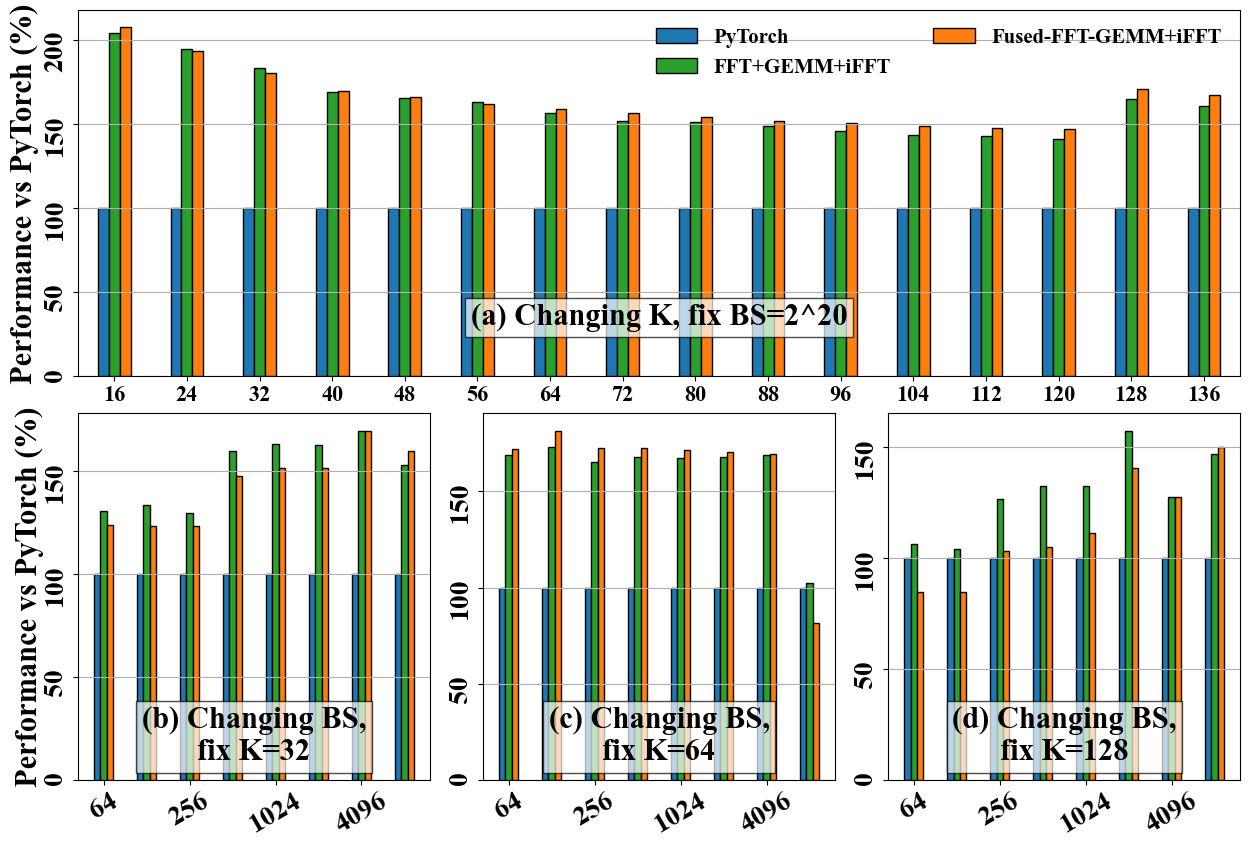

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import torch as th
import numpy as np
import matplotlib as mpl
# mpl.rcParams['text.usetex'] = True

# # Specify the font: Times New Roman
# mpl.rcParams['text.latex.preamble'] = r'\usepackage{times}'
plt.rcParams['pdf.fonttype'] = 42  # Type1 字体
plt.rcParams['ps.fonttype'] = 42   # Type1 字体

font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 20}
mpl.rc('font', **font)
gpu = 'A100'
fontsize = 20
logN_beg, logN_end = 1, 26
logBS_beg, logBS_end = 0, 4


N_list = [4, 10, 14, 20]
# fig, ax = plt.subplots(2, 3, figsize=(15, 10))
precision = 1
fig = plt.figure(figsize=(15, 10))
ax = []
ax.append(fig.add_subplot(2, 1, 1))
tmp_axs = []
tmp_axs.append(fig.add_subplot(2, 3, 4))
tmp_axs.append(fig.add_subplot(2, 3, 5))
tmp_axs.append(fig.add_subplot(2, 3, 6))
ax.append(tmp_axs)

fig.subplots_adjust(hspace=0.1, wspace=0.15)
color = sns.color_palette(n_colors=5)
# A100_fp32_combine = th.cat([cuFFT[0], TurboFFT[0], vkFFT[0]], dim=0)
width = 0.15
# for tmp_ax in ax[0, 1:]:
#     tmp_ax.axis('off')
def select_data(N, begin, end):
    bars = []
    
    bar =  data[-1][1, 0] / data[0][1, 0] * 100
    bars.append(bar)
    # print(bar.shape, bar[begin:end].shape)
    # assert 0
    FFT_GEMM_iFFT = th.cat([bar[:, N[0]], bar[:, N[1]], bar[:, N[2]]], dim=0)
    
    bar = data[-1][1, 0] / data[-1][1, 0] * 100
    bars.append(bar)
    pytorch = th.cat([bar[:, N[0]], bar[:, N[1]], bar[:, N[2]]], dim=0)
    
 
    bar = data[-1][1, 0] / data[1][1, 0] * 100
    bars.append(bar)
    FFTGEMM_iFFT = th.cat([bar[:, N[0]], bar[:, N[1]], bar[:, N[2]]], dim=0)
    x = np.arange(bar.shape[1])
    n = bar.shape[1]
    # ax[0].set_ylabel()
    tmp_ax = ax[0]
    tmp_ax.bar(x - width, width=width, height=bars[1][-1, :], color=color[0], label = 'PyTorch', edgecolor='black')
    tmp_ax.bar(x, width=width, height=bars[0][-1, :], color=color[2], label = 'FFT+GEMM+iFFT', edgecolor='black')
    tmp_ax.bar(x + width, width=width, height=bars[2][-1, :], color=color[1], label = 'Fused-FFT-GEMM+iFFT', edgecolor='black')
    # tmp_ax.bar(x + width, width=width, height=bars[1][:, 0], color=color[1], label = 'cuFFT', edgecolor='black')
    tmp_ax.set_xticks(x)
    tmp_ax.set_xticklabels([f'{(i + 1) * 8}' for i in range(1, n + 1, 1)], fontdict={'fontsize': 16, 'weight':'bold'}, rotation=0)
    tmp_ax.text(.5, .2, f'(a) Changing K, fix BS=2^20', ha='center', va='top',
                transform=tmp_ax.transAxes, fontdict={'weight': 'bold', 'fontsize':22},
                bbox=dict(facecolor='white', alpha=0.7) )
    tmp_ax.grid(axis='y')
    tmp_ax.set_xlim([-0.5, 15.5])

    x = np.arange((end - begin))
    n = end - begin
    id = 'bcde'
    for i in range(3):
        tmp_ax = ax[1][i]
        tmp_ax.bar(x - width, width=width, height=pytorch[i * n:(i + 1) * n], color=color[0], label = 'PyTorch', edgecolor='black')
        tmp_ax.bar(x, width=width, height=FFT_GEMM_iFFT[i * n:(i + 1) * n], color=color[2], label = 'FFT+GEMM+iFFT', edgecolor='black')
        tmp_ax.bar(x + width, width=width, height=FFTGEMM_iFFT[i * n:(i + 1) * n], color=color[1], label = 'Fused-FFT-GEMM+iFFT', edgecolor='black')
        # tmp_ax.bar(x, width=width, height=turboFFT_bar[i * n:(i + 1) * n], color=color[0], label='TurboFFT', edgecolor='black')
        
        tmp_ax.text(.5, .2, f'({id[i]}) Changing BS,\nfix K=' + f'{N[i] * 8 + 8}' + '', ha='center', va='top', transform=tmp_ax.transAxes, 
                    fontdict={'weight': 'bold', 'fontsize':22},
                    bbox=dict(facecolor='white', alpha=0.7))
       
        tmp_ax.set_xticks([i for i in range(0, n, 2)])
        tmp_ax.set_xticklabels([f'{2**(i + 6)}' for i in range(0, n, 2)], fontdict={'fontsize': 20, 'weight':'bold'}, rotation=30)
        # tmp_ax.set_xlabel(f'Batch size\nFix N = 2^{N[i]}', fontdict={'fontsize': 22, 'weight':'bold'})
        tmp_ax.locator_params(axis='y', nbins=4) 
        tmp_ax.tick_params(axis='y', labelsize=20, labelrotation=90)
        tmp_ax.yaxis.labelpad = 0
        tmp_ax.grid(axis='y')

select_data([4-1, 8-1, 16-1], 6, 14)
ax[1][0].set_ylabel('Performance vs PyTorch (%)', fontdict={'fontsize': 22, 'weight':'bold'})
ax[0].set_ylabel('Performance vs PyTorch (%)', fontdict={'fontsize': 22, 'weight':'bold'})
ax[0].tick_params(axis='y', labelsize=20, labelrotation=90)
# if precision == 1:
#     ax[0].set_ylim([0, 175])
# ax[1][0].legend( ncol=3, fontsize=22, loc=(0.6, -0.28), frameon=False)
ax[0].legend( ncol=2, fontsize=15,  loc='upper right', frameon=False)
# plt.savefig('1D_bar_B.pdf', bbox_inches='tight')
plt.savefig('figs/png/1D_bar_B.png', bbox_inches='tight', dpi=50)



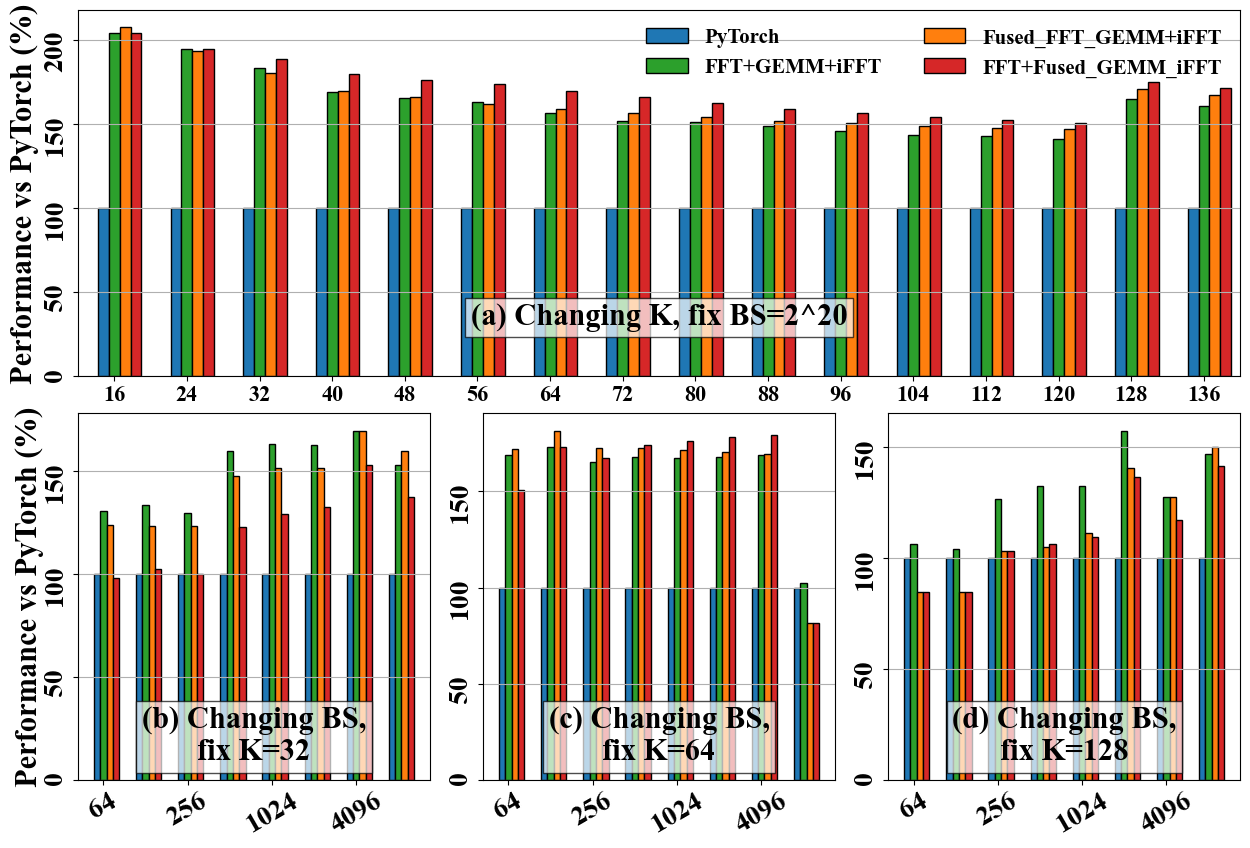

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import torch as th
import numpy as np
import matplotlib as mpl
# mpl.rcParams['text.usetex'] = True

# # Specify the font: Times New Roman
# mpl.rcParams['text.latex.preamble'] = r'\usepackage{times}'
plt.rcParams['pdf.fonttype'] = 42  # Type1 字体
plt.rcParams['ps.fonttype'] = 42   # Type1 字体

font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 20}
mpl.rc('font', **font)
gpu = 'A100'
fontsize = 20
logN_beg, logN_end = 1, 26
logBS_beg, logBS_end = 0, 4


N_list = [4, 10, 14, 20]
# fig, ax = plt.subplots(2, 3, figsize=(15, 10))
precision = 1
fig = plt.figure(figsize=(15, 10))
ax = []
ax.append(fig.add_subplot(2, 1, 1))
tmp_axs = []
tmp_axs.append(fig.add_subplot(2, 3, 4))
tmp_axs.append(fig.add_subplot(2, 3, 5))
tmp_axs.append(fig.add_subplot(2, 3, 6))
ax.append(tmp_axs)

fig.subplots_adjust(hspace=0.1, wspace=0.15)
color = sns.color_palette(n_colors=5)
# A100_fp32_combine = th.cat([cuFFT[0], TurboFFT[0], vkFFT[0]], dim=0)
width = 0.15
# for tmp_ax in ax[0, 1:]:
#     tmp_ax.axis('off')
def select_data(N, begin, end):
    bars = []
    
    bar =  data[-1][1, 0] / data[0][1, 0] * 100
    bars.append(bar)
    # print(bar.shape, bar[begin:end].shape)
    # assert 0
    FFT_GEMM_iFFT = th.cat([bar[:, N[0]], bar[:, N[1]], bar[:, N[2]]], dim=0)
    
    bar = data[-1][1, 0] / data[-1][1, 0] * 100
    bars.append(bar)
    pytorch = th.cat([bar[:, N[0]], bar[:, N[1]], bar[:, N[2]]], dim=0)
    
 
    bar = data[-1][1, 0] / data[1][1, 0] * 100
    bars.append(bar)
    FFTGEMM_iFFT = th.cat([bar[:, N[0]], bar[:, N[1]], bar[:, N[2]]], dim=0)
    
    bar = data[-1][1, 0] / data[2][1, 0] * 100
    bars.append(bar)
    FFT_GEMMiFFT = th.cat([bar[:, N[0]], bar[:, N[1]], bar[:, N[2]]], dim=0)
    x = np.arange(bar.shape[1])
    n = bar.shape[1]
    # ax[0].set_ylabel()
    tmp_ax = ax[0]
    tmp_ax.bar(x - width, width=width, height=bars[1][-1, :], color=color[0], label = 'PyTorch', edgecolor='black')
    tmp_ax.bar(x, width=width, height=bars[0][-1, :], color=color[2], label = 'FFT+GEMM+iFFT', edgecolor='black')
    tmp_ax.bar(x + width, width=width, height=bars[2][-1, :], color=color[1], label = 'Fused_FFT_GEMM+iFFT', edgecolor='black')
    tmp_ax.bar(x + 2 * width, width=width, height=bars[3][-1, :], color=color[3], label = 'FFT+Fused_GEMM_iFFT', edgecolor='black')
    # tmp_ax.bar(x + width, width=width, height=bars[1][:, 0], color=color[1], label = 'cuFFT', edgecolor='black')
    tmp_ax.set_xticks(x)
    tmp_ax.set_xticklabels([f'{(i + 1) * 8}' for i in range(1, n + 1, 1)], fontdict={'fontsize': 16, 'weight':'bold'}, rotation=0)
    tmp_ax.text(.5, .2, f'(a) Changing K, fix BS=2^20', ha='center', va='top',
                transform=tmp_ax.transAxes, fontdict={'weight': 'bold', 'fontsize':22},
                bbox=dict(facecolor='white', alpha=0.7) )
    tmp_ax.grid(axis='y')
    tmp_ax.set_xlim([-0.5, 15.5])

    x = np.arange((end - begin))
    n = end - begin
    id = 'bcde'
    for i in range(3):
        tmp_ax = ax[1][i]
        tmp_ax.bar(x - width, width=width, height=pytorch[i * n:(i + 1) * n], color=color[0], label = 'PyTorch', edgecolor='black')
        tmp_ax.bar(x, width=width, height=FFT_GEMM_iFFT[i * n:(i + 1) * n], color=color[2], label = 'FFT+GEMM+iFFT', edgecolor='black')
        tmp_ax.bar(x + width, width=width, height=FFTGEMM_iFFT[i * n:(i + 1) * n], color=color[1], label = 'Fused_FFT_GEMM+iFFT', edgecolor='black')
        tmp_ax.bar(x + 2 * width, width=width, height=FFT_GEMMiFFT[i * n:(i + 1) * n], color=color[3], label = 'Fused_FFT_GEMM+iFFT', edgecolor='black')
        # tmp_ax.bar(x, width=width, height=turboFFT_bar[i * n:(i + 1) * n], color=color[0], label='TurboFFT', edgecolor='black')
        
        tmp_ax.text(.5, .2, f'({id[i]}) Changing BS,\nfix K=' + f'{N[i] * 8 + 8}' + '', ha='center', va='top', transform=tmp_ax.transAxes, 
                    fontdict={'weight': 'bold', 'fontsize':22},
                    bbox=dict(facecolor='white', alpha=0.7))
       
        tmp_ax.set_xticks([i for i in range(0, n, 2)])
        tmp_ax.set_xticklabels([f'{2**(i + 6)}' for i in range(0, n, 2)], fontdict={'fontsize': 20, 'weight':'bold'}, rotation=30)
        # tmp_ax.set_xlabel(f'Batch size\nFix N = 2^{N[i]}', fontdict={'fontsize': 22, 'weight':'bold'})
        tmp_ax.locator_params(axis='y', nbins=4) 
        tmp_ax.tick_params(axis='y', labelsize=20, labelrotation=90)
        tmp_ax.yaxis.labelpad = 0
        tmp_ax.grid(axis='y')

select_data([4-1, 8-1, 16-1], 6, 14)
ax[1][0].set_ylabel('Performance vs PyTorch (%)', fontdict={'fontsize': 22, 'weight':'bold'})
ax[0].set_ylabel('Performance vs PyTorch (%)', fontdict={'fontsize': 22, 'weight':'bold'})
ax[0].tick_params(axis='y', labelsize=20, labelrotation=90)
# if precision == 1:
#     ax[0].set_ylim([0, 175])
# ax[1][0].legend( ncol=3, fontsize=22, loc=(0.6, -0.28), frameon=False)
ax[0].legend( ncol=2, fontsize=15,  loc='upper right', frameon=False)
# plt.savefig('1D_bar_C.pdf', bbox_inches='tight')
plt.savefig('figs/png/1D_bar_C.png', bbox_inches='tight', dpi=50)



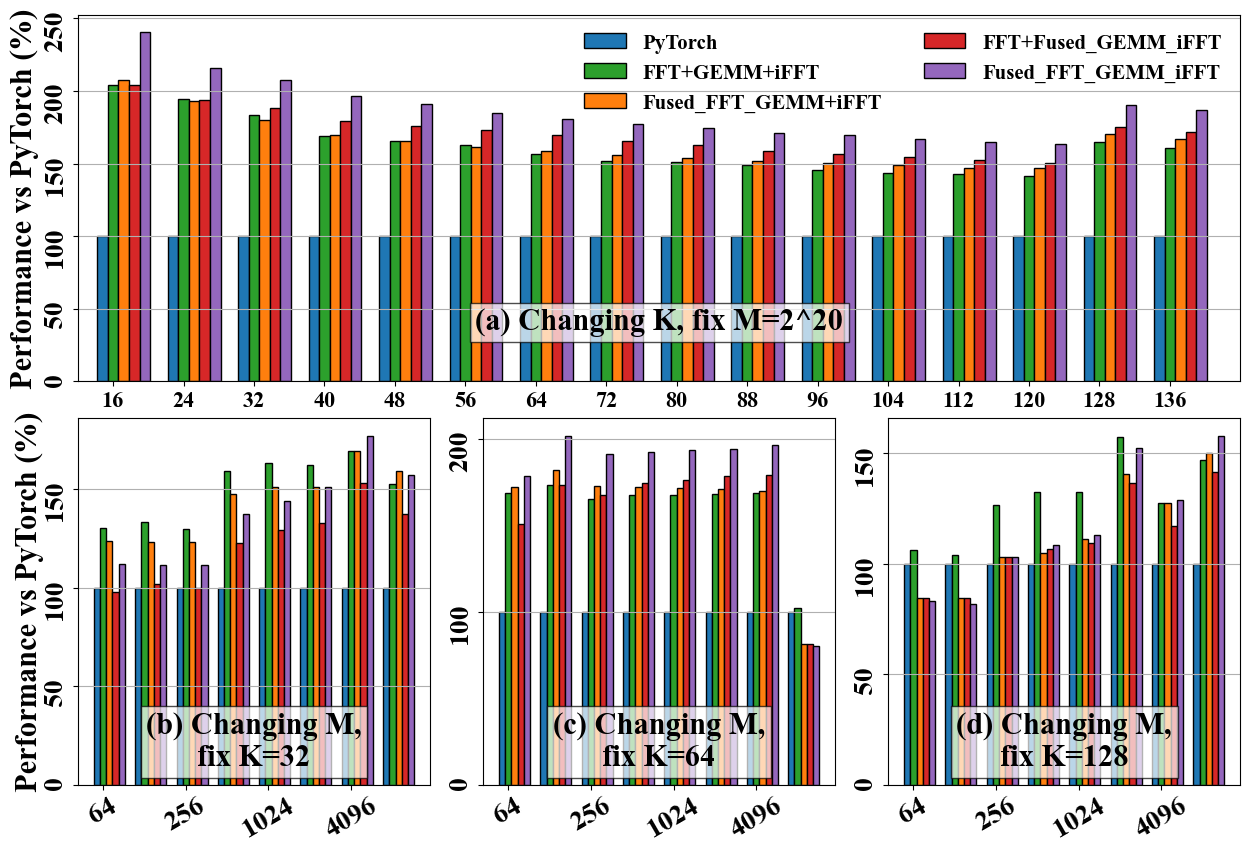

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import torch as th
import numpy as np
import matplotlib as mpl
# mpl.rcParams['text.usetex'] = True

# # Specify the font: Times New Roman
# mpl.rcParams['text.latex.preamble'] = r'\usepackage{times}'
plt.rcParams['pdf.fonttype'] = 42  # Type1 字体
plt.rcParams['ps.fonttype'] = 42   # Type1 字体

font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 20}
mpl.rc('font', **font)
gpu = 'A100'
fontsize = 20
logN_beg, logN_end = 1, 26
logBS_beg, logBS_end = 0, 4


N_list = [4, 10, 14, 20]
# fig, ax = plt.subplots(2, 3, figsize=(15, 10))
precision = 1
fig = plt.figure(figsize=(15, 10))
ax = []
ax.append(fig.add_subplot(2, 1, 1))
tmp_axs = []
tmp_axs.append(fig.add_subplot(2, 3, 4))
tmp_axs.append(fig.add_subplot(2, 3, 5))
tmp_axs.append(fig.add_subplot(2, 3, 6))
ax.append(tmp_axs)

fig.subplots_adjust(hspace=0.1, wspace=0.15)
color = sns.color_palette(n_colors=5)
# A100_fp32_combine = th.cat([cuFFT[0], TurboFFT[0], vkFFT[0]], dim=0)
width = 0.15
# for tmp_ax in ax[0, 1:]:
#     tmp_ax.axis('off')
def select_data(N, begin, end):
    bars = []
    
    bar =  data[-1][1, 0] / data[0][1, 0] * 100
    bars.append(bar)
    # print(bar.shape, bar[begin:end].shape)
    # assert 0
    FFT_GEMM_iFFT = th.cat([bar[:, N[0]], bar[:, N[1]], bar[:, N[2]]], dim=0)
    
    bar = data[-1][1, 0] / data[-1][1, 0] * 100
    bars.append(bar)
    pytorch = th.cat([bar[:, N[0]], bar[:, N[1]], bar[:, N[2]]], dim=0)
    
 
    bar = data[-1][1, 0] / data[1][1, 0] * 100
    bars.append(bar)
    FFTGEMM_iFFT = th.cat([bar[:, N[0]], bar[:, N[1]], bar[:, N[2]]], dim=0)
    
    bar = data[-1][1, 0] / data[2][1, 0] * 100
    bars.append(bar)
    FFT_GEMMiFFT = th.cat([bar[:, N[0]], bar[:, N[1]], bar[:, N[2]]], dim=0)
    bar = data[-1][1, 0] / data[3][1, 0] * 100
    bars.append(bar)
    FFTGEMMiFFT = th.cat([bar[:, N[0]], bar[:, N[1]], bar[:, N[2]]], dim=0)
    x = np.arange(bar.shape[1])
    n = bar.shape[1]
    # ax[0].set_ylabel()
    tmp_ax = ax[0]
    tmp_ax.bar(x - width, width=width, height=bars[1][-1, :], color=color[0], label = 'PyTorch', edgecolor='black')
    tmp_ax.bar(x, width=width, height=bars[0][-1, :], color=color[2], label = 'FFT+GEMM+iFFT', edgecolor='black')
    tmp_ax.bar(x + width, width=width, height=bars[2][-1, :], color=color[1], label = 'Fused_FFT_GEMM+iFFT', edgecolor='black')
    tmp_ax.bar(x + 2 * width, width=width, height=bars[3][-1, :], color=color[3], label = 'FFT+Fused_GEMM_iFFT', edgecolor='black')
    tmp_ax.bar(x + 3 * width, width=width, height=bars[4][-1, :], color=color[4], label = 'Fused_FFT_GEMM_iFFT', edgecolor='black')
    # tmp_ax.bar(x + width, width=width, height=bars[1][:, 0], color=color[1], label = 'cuFFT', edgecolor='black')
    tmp_ax.set_xticks(x)
    tmp_ax.set_xticklabels([f'{(i + 1) * 8}' for i in range(1, n + 1, 1)], fontdict={'fontsize': 16, 'weight':'bold'}, rotation=0)
    tmp_ax.text(.5, .2, f'(a) Changing K, fix BS=2^20', ha='center', va='top',
                transform=tmp_ax.transAxes, fontdict={'weight': 'bold', 'fontsize':22},
                bbox=dict(facecolor='white', alpha=0.7) )
    tmp_ax.grid(axis='y')
    tmp_ax.set_xlim([-0.5, 16])

    x = np.arange((end - begin))
    n = end - begin
    id = 'bcde'
    for i in range(3):
        tmp_ax = ax[1][i]
        tmp_ax.bar(x - width, width=width, height=pytorch[i * n:(i + 1) * n], color=color[0], label = 'PyTorch', edgecolor='black')
        tmp_ax.bar(x, width=width, height=FFT_GEMM_iFFT[i * n:(i + 1) * n], color=color[2], label = 'FFT+GEMM+iFFT', edgecolor='black')
        tmp_ax.bar(x + width, width=width, height=FFTGEMM_iFFT[i * n:(i + 1) * n], color=color[1], label = 'Fused_FFT_GEMM+iFFT', edgecolor='black')
        tmp_ax.bar(x + 2 * width, width=width, height=FFT_GEMMiFFT[i * n:(i + 1) * n], color=color[3], label = 'Fused_FFT_GEMM+iFFT', edgecolor='black')
        tmp_ax.bar(x + 3 * width, width=width, height=FFTGEMMiFFT[i * n:(i + 1) * n], color=color[4], label = 'Fused_FFT_GEMM_iFFT', edgecolor='black')
        # tmp_ax.bar(x, width=width, height=turboFFT_bar[i * n:(i + 1) * n], color=color[0], label='TurboFFT', edgecolor='black')
        
        tmp_ax.text(.5, .2, f'({id[i]}) Changing BS,\nfix K=' + f'{N[i] * 8 + 8}' + '', ha='center', va='top', transform=tmp_ax.transAxes, 
                    fontdict={'weight': 'bold', 'fontsize':22},
                    bbox=dict(facecolor='white', alpha=0.7))
       
        tmp_ax.set_xticks([i for i in range(0, n, 2)])
        tmp_ax.set_xticklabels([f'{2**(i + 6)}' for i in range(0, n, 2)], fontdict={'fontsize': 20, 'weight':'bold'}, rotation=30)
        # tmp_ax.set_xlabel(f'Batch size\nFix N = 2^{N[i]}', fontdict={'fontsize': 22, 'weight':'bold'})
        tmp_ax.locator_params(axis='y', nbins=4) 
        tmp_ax.tick_params(axis='y', labelsize=20, labelrotation=90)
        tmp_ax.yaxis.labelpad = 0
        tmp_ax.grid(axis='y')

select_data([4-1, 8-1, 16-1], 6, 14)
ax[1][0].set_ylabel('Performance vs PyTorch (%)', fontdict={'fontsize': 22, 'weight':'bold'})
ax[0].set_ylabel('Performance vs PyTorch (%)', fontdict={'fontsize': 22, 'weight':'bold'})
ax[0].tick_params(axis='y', labelsize=20, labelrotation=90)
# if precision == 1:
# ax[0].set_ylim([0, 200])
# ax[1][0].legend( ncol=3, fontsize=22, loc=(0.6, -0.28), frameon=False)
ax[0].legend( ncol=2, fontsize=15,  loc='upper right', frameon=False)
# plt.savefig('1D_bar_D.pdf', bbox_inches='tight')
plt.savefig('figs/png/1D_bar_D.png', bbox_inches='tight', dpi=50)

